In [ ]:
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion 
matrix, accuracy, error rate, precision and recall on the given dataset. 
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [5]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
cols_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in cols_to_replace:
    data[column].replace(0, np.nan)
    data[column].fillna(round(data[column].mean(skipna=True)))

In [7]:
X = data.iloc[:,:8]
Y = data['Outcome']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
knn_pred = knn.predict(x_test)

In [11]:
cm = confusion_matrix(y_test, knn_pred)
accuracy = accuracy_score(y_test, knn_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)

In [12]:
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy)
print("Error Rate:", error_rate)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[87 20]
 [18 29]]
Accuracy Score: 0.7532467532467533
Error Rate: 0.24675324675324672
Precision Score: 0.5918367346938775
Recall Score: 0.6170212765957447
F1 Score: 0.6041666666666666


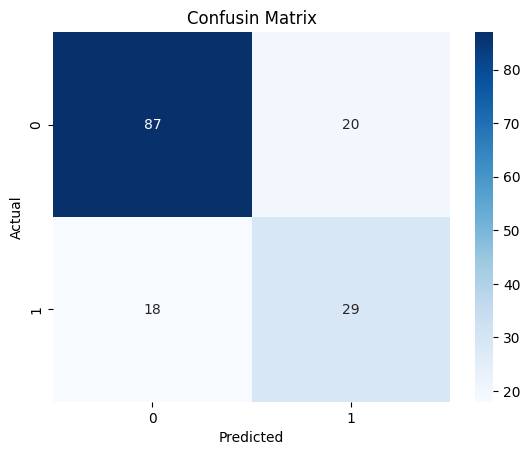

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusin Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()